Романовский А.Н. 23.10.22

### Задача:
Подготовить данные для этапа моделирования (обучения)
    
1. Анализ данных, необходимые корректировки. 
2. Обработать пропуски. 
3. Оценить выбросы. 
4. Корреляция. 
5. Тест на нормальность распределения.
6. Масштабировать и стандартизировать данные.
7. Разделите данные на тренрровачную и тестовую выборку.
8. При обработке пропусков/выбросов/скалировании тестовую и тренировачную выборку обрабатывать отдельно.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import  normaltest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('credit_train.csv', sep = ';', decimal=",")

In [3]:
df.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


In [4]:
df.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'living_region', 'monthly_income', 'credit_count',
       'overdue_credit_count', 'open_account_flg'],
      dtype='object')

In [5]:
df['marital_status'].unique()

array([nan, 'MAR', 'UNM', 'DIV', 'WID', 'CIV'], dtype=object)

In [6]:
df['job_position'].unique()

array(['UMN', 'SPC', 'INP', 'DIR', 'ATP', 'PNA', 'BIS', 'WOI', 'NOR',
       'WRK', 'WRP', 'PNV', 'BIU', 'PNI', 'HSK', 'PNS', 'INV', 'ONB'],
      dtype=object)

In [7]:
df['education'].unique()

array(['GRD', nan, 'SCH', 'UGR', 'PGR', 'ACD'], dtype=object)

### Значения переменных:
* client_id - Номер клиента 
* gender - Пол
* age - Возраст 
* marital_status - Семейное положение 
* job_position - Работа 
* credit_sum - Сумма кредита 
* credit_month - Срок кредитования 
* tariff_id - Номер предпологаемого тарифа 
* score_shk - ??
* education - Образование 
* living_region - Регион проживания 
* monthly_income - Месячный заработок 
* credit_count - Количество кредитов у клиента 
* overdue_credit_count - Количество просроченных кредитов у клиента 
* open_account_flg  - Флаг выбора кредита
___

* Целевая переменная - open_account_flg
____
#### Возможные значения в стобцах: 
* marital_status
- MAR : Женат/замужем
- DIV : Резведен (а)
- UNM : Холост/не замужем 
- CIV : Гражданский брак 
- WID : Вдовец, вдова 
____
* job_position
    - SPC : Неруководящий сотрудник - специалист 
    - DIR : Руководитель организации 
    - HSK : Домохозяйка 
    - WOI : Работает на ИП 
    - WRK : Неруководящий сотрудник - рабочий 
    - ATP : Неруководящий сотрудник - обслуживающий персонал 
    - WRP : Работающий пенсионер 
    - UMN : Руководитель подразделения 
    - NOR : Не работает 
    - PNS : Пенсионер 
    - BIS : Собственный бизнес 
    - INP : Индивидуальный предприниматель
____
* education
- SCH : Начальное, среднее 
- PGR : Второе высшее 
- GRD : Высшее 
- UGR : Неполное высшее 
- ACD : Ученая степень

In [8]:
new_data = df.drop(columns = ['client_id'],axis = 1) # удалим id клиента

In [9]:
new_data.isnull().sum() #наличие пропусков в каждой из строк 

gender                     0
age                        3
marital_status             3
job_position               0
credit_sum                 2
credit_month               0
tariff_id                  0
score_shk                  7
education                  5
living_region            192
monthly_income             5
credit_count            9230
overdue_credit_count    9230
open_account_flg           0
dtype: int64

In [10]:
new_data.describe() #посмотрим информацию о значениях в числовых стобцах 

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170743.000000,170744.000000,170746.000000,170739.000000,170741.000000,161516.000000,161516.000000,170746.000000
mean,36.497262,26095.097541,10.980749,0.469473,40138.596149,2.107308,0.046070,0.176028
std,10.546044,16234.874095,3.536698,0.124265,25044.373992,1.777128,0.211548,0.380845
min,18.000000,2736.000000,3.000000,0.000000,5000.000000,0.000000,0.000000,0.000000
25%,28.000000,14908.000000,10.000000,0.379522,25000.000000,1.000000,0.000000,0.000000
50%,34.000000,21229.000000,10.000000,0.461599,35000.000000,2.000000,0.000000,0.000000
75%,43.000000,32068.000000,12.000000,0.552412,50000.000000,3.000000,0.000000,0.000000
max,71.000000,200000.000000,36.000000,1.128291,950000.000000,21.000000,3.000000,1.000000


In [11]:
#посмотрим инфорцию о занчениях в нечисловых стобцах 

In [12]:
new_data['marital_status'].describe()

count     170743
unique         5
top          MAR
freq       93954
Name: marital_status, dtype: object

In [13]:
new_data['education'].describe()

count     170741
unique         5
top          SCH
freq       87537
Name: education, dtype: object

In [14]:
new_data['living_region'].describe()

count             170554
unique               301
top       ОБЛ МОСКОВСКАЯ
freq               12228
Name: living_region, dtype: object

In [15]:
new_data['age'].fillna(new_data['age'].mean(), inplace=True) #заполняем пропуски возраста, средним значением по столбцу 
new_data['marital_status'].fillna('MAR', inplace=True) #заменяем пропуски в колонке семейное положение, самым частым 
new_data['credit_sum'].fillna(new_data['credit_sum'].mean(), inplace=True) #заменяем пропуски сумм кредита средним по столбцу
new_data['score_shk'].fillna(new_data['score_shk'].mean(), inplace=True)#заменяем загадочный стобец средним по столбцу
new_data['education'].fillna('SCH', inplace=True)#с образованием так же, самым частым значением 
new_data['monthly_income'].fillna(new_data['monthly_income'].mean(), inplace=True)#аналогично со столбцом з.п.


* Т.к. количество пропусков в столбцах количество кредитов и количество просроченых кредитов совпадает, предпологаю что у данных клиентов нет кредитов, и заменяю пропуски на 0

In [16]:
new_data['credit_count'].fillna(0, inplace=True)
new_data['overdue_credit_count'].fillna(0, inplace=True)  
 

In [17]:
# перезапишем наши регионы в рабочий вид
new_data['living_region'].replace({ 
'ОБЛ МОСКОВСКАЯ': 'ОБЛ МОСКОВСКАЯ',
'КРАСНОДАРСКИЙ КРАЙ': 'КРАСНОДАРСКИЙ КРАЙ',
'САНКТ-ПЕТЕРБУРГ': 'САНКТ-ПЕТЕРБУРГ',
'МОСКВА': 'МОСКВА',
'ТАТАРСТАН РЕСП': 'ТАТАРСТАН РЕСП',
'РЕСП БАШКОРТОСТАН': 'РЕСП БАШКОРТОСТАН',
'ОБЛ ИРКУТСКАЯ': 'ОБЛ ИРКУТСКАЯ',
'СВЕРДЛОВСКАЯ ОБЛ': 'СВЕРДЛОВСКАЯ ОБЛ',
'МОСКВА Г': 'МОСКВА',
'ОБЛ НИЖЕГОРОДСКАЯ': 'ОБЛ НИЖЕГОРОДСКАЯ',
'ОБЛ ЛЕНИНГРАДСКАЯ': 'ОБЛ ЛЕНИНГРАДСКАЯ',
'РОСТОВСКАЯ ОБЛ': 'РОСТОВСКАЯ ОБЛ',
'КРАСНОЯРСКИЙ КРАЙ': 'КРАСНОЯРСКИЙ КРАЙ',
'ЧЕЛЯБИНСКАЯ ОБЛ': 'ЧЕЛЯБИНСКАЯ ОБЛ',
'ОБЛ САМАРСКАЯ': 'ОБЛ САМАРСКАЯ',
'ОБЛ КЕМЕРОВСКАЯ': 'ОБЛ КЕМЕРОВСКАЯ',
'ПЕРМСКИЙ КРАЙ': 'ПЕРМСКИЙ КРАЙ',
'САНКТ-ПЕТЕРБУРГ Г': 'САНКТ-ПЕТЕРБУРГ',
'КРАЙ СТАВРОПОЛЬСКИЙ': 'КРАЙ СТАВРОПОЛЬСКИЙ',
'ОБЛ АСТРАХАНСКАЯ': 'ОБЛ АСТРАХАНСКАЯ',
'ОБЛ ВОЛОГОДСКАЯ': 'ОБЛ ВОЛОГОДСКАЯ',
'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА': 'ХАНТЫ-МАНСИЙСКИЙ АО',
'ОБЛ ВОЛГОГРАДСКАЯ': 'ОБЛ ВОЛГОГРАДСКАЯ',
'РЕСПУБЛИКА ТАТАРСТАН': 'ТАТАРСТАН РЕСП',
'ОБЛ НОВОСИБИРСКАЯ': 'ОБЛ НОВОСИБИРСКАЯ',
'СВЕРДЛОВСКАЯ ОБЛАСТЬ': 'СВЕРДЛОВСКАЯ ОБЛ',
'СТАВРОПОЛЬСКИЙ КРАЙ': 'КРАЙ СТАВРОПОЛЬСКИЙ',
'ЯМАЛО-НЕНЕЦКИЙ АО': 'ЯМАЛО-НЕНЕЦКИЙ АО',
'ОБЛ ВОРОНЕЖСКАЯ': 'ОБЛ ВОРОНЕЖСКАЯ',
'ОБЛ АРХАНГЕЛЬСКАЯ': 'ОБЛ АРХАНГЕЛЬСКАЯ',
'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ': 'ЧЕЛЯБИНСКАЯ ОБЛ',
'ХАБАРОВСКИЙ КРАЙ': 'ХАБАРОВСКИЙ КРАЙ',
'ОБЛ ВЛАДИМИРСКАЯ': 'ОБЛ ВЛАДИМИРСКАЯ',
'ХАНТЫ-МАНСИЙСКИЙ АО': 'ХАНТЫ-МАНСИЙСКИЙ АО',
'РЕСП. БАШКОРТОСТАН': 'РЕСП БАШКОРТОСТАН',
'САРАТОВСКАЯ ОБЛ': 'САРАТОВСКАЯ ОБЛ',
'САМАРСКАЯ ОБЛ': 'ОБЛ САМАРСКАЯ',
'ОБЛ МУРМАНСКАЯ': 'ОБЛ МУРМАНСКАЯ',
'ОБЛ СВЕРДЛОВСКАЯ': 'СВЕРДЛОВСКАЯ ОБЛ',
'ОБЛ КУРГАНСКАЯ': 'ОБЛ КУРГАНСКАЯ',
'РЕСП КОМИ': 'РЕСП КОМИ',
'ПРИМОРСКИЙ КРАЙ': 'ПРИМОРСКИЙ КРАЙ',
'САХА /ЯКУТИЯ/ РЕСП': 'САХА /ЯКУТИЯ/ РЕСП',
'РЕСП БУРЯТИЯ': 'РЕСП БУРЯТИЯ',
'ТЮМЕНСКАЯ ОБЛ': 'ТЮМЕНСКАЯ ОБЛ',
'КРАЙ ЗАБАЙКАЛЬСКИЙ': 'КРАЙ ЗАБАЙКАЛЬСКИЙ',
'ОБЛ КУРСКАЯ': 'ОБЛ КУРСКАЯ',
'ОБЛ КАЛУЖСКАЯ': 'ОБЛ КАЛУЖСКАЯ',
'РОСТОВСКАЯ ОБЛАСТЬ': 'РОСТОВСКАЯ ОБЛ',
'ОРЕНБУРГСКАЯ ОБЛ': 'ОРЕНБУРГСКАЯ ОБЛ',
'ОБЛ ИВАНОВСКАЯ': 'ОБЛ ИВАНОВСКАЯ',
'ТВЕРСКАЯ ОБЛ': 'ТВЕРСКАЯ ОБЛ',
'КРАЙ КРАСНОДАРСКИЙ': 'КРАСНОДАРСКИЙ КРАЙ',
'ТУЛЬСКАЯ ОБЛ': 'ТУЛЬСКАЯ ОБЛ',
'ОБЛ ЛИПЕЦКАЯ': 'ОБЛ ЛИПЕЦКАЯ',
'КРАЙ ПЕРМСКИЙ': 'ПЕРМСКИЙ КРАЙ',
'САМАРСКАЯ ОБЛАСТЬ': 'ОБЛ САМАРСКАЯ',
'ОБЛ АМУРСКАЯ': 'ОБЛ АМУРСКАЯ',
'ОБЛ БРЯНСКАЯ': 'ОБЛ БРЯНСКАЯ',
'УДМУРТСКАЯ РЕСП': 'УДМУРТСКАЯ РЕСП',
'ОБЛ НОВГОРОДСКАЯ': 'ОБЛ НОВГОРОДСКАЯ',
'САРАТОВСКАЯ ОБЛАСТЬ': 'САРАТОВСКАЯ ОБЛ',
'ОБЛ КАЛИНИНГРАДСКАЯ': 'ОБЛ КАЛИНИНГРАДСКАЯ',
'ОБЛ БЕЛГОРОДСКАЯ': 'ОБЛ БЕЛГОРОДСКАЯ',
'ОБЛ ЧЕЛЯБИНСКАЯ': 'ЧЕЛЯБИНСКАЯ ОБЛ',
'СМОЛЕНСКАЯ ОБЛ': 'СМОЛЕНСКАЯ ОБЛ',
'ТАМБОВСКАЯ ОБЛ': 'ТАМБОВСКАЯ ОБЛ',
'ОБЛ КИРОВСКАЯ': 'ОБЛ КИРОВСКАЯ',
'ОБЛ ТЮМЕНСКАЯ': 'ТЮМЕНСКАЯ ОБЛ',
'ТЮМЕНСКАЯ ОБЛАСТЬ': 'ТЮМЕНСКАЯ ОБЛ',
'РЕСП КАБАРДИНО-БАЛКАРСКАЯ': 'РЕСП КАБАРДИНО-БАЛКАРСКАЯ',
'ОМСКАЯ ОБЛ': 'ОМСКАЯ ОБЛ',
'УЛЬЯНОВСКАЯ ОБЛ': 'УЛЬЯНОВСКАЯ ОБЛ',
'РЕСП КАРЕЛИЯ': 'РЕСП КАРЕЛИЯ',
'РЕСПУБЛИКА КОМИ': 'РЕСП КОМИ',
'РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ': 'РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ',
'АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю': 'ХАНТЫ-МАНСИЙСКИЙ АО',
'ЯРОСЛАВСКАЯ ОБЛ': 'ЯРОСЛАВСКАЯ ОБЛ',
'КРАЙ АЛТАЙСКИЙ': 'КРАЙ АЛТАЙСКИЙ',
'РЕСП. САХА (ЯКУТИЯ)': 'САХА /ЯКУТИЯ/ РЕСП',
'ТВЕРСКАЯ ОБЛАСТЬ': 'ТВЕРСКАЯ ОБЛ',
'ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ': 'ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ',
'ОБЛ КОСТРОМСКАЯ': 'ОБЛ КОСТРОМСКАЯ',
'ПЕНЗЕНСКАЯ ОБЛ': 'ПЕНЗЕНСКАЯ ОБЛ',
'РЕСП МАРИЙ ЭЛ': 'РЕСП МАРИЙ ЭЛ',
'РЕСП МОРДОВИЯ': 'РЕСП МОРДОВИЯ',
'САХАЛИНСКАЯ ОБЛ': 'САХАЛИНСКАЯ ОБЛ',
'ОРЛОВСКАЯ ОБЛ': 'ОРЛОВСКАЯ ОБЛ',
'ТУЛЬСКАЯ ОБЛАСТЬ': 'ТУЛЬСКАЯ ОБЛ',
'КРАЙ КАМЧАТСКИЙ': 'КРАЙ КАМЧАТСКИЙ',
'ТЫВА РЕСП': 'ТЫВА РЕСП',
'РЯЗАНСКАЯ ОБЛ': 'РЯЗАНСКАЯ ОБЛ',
'ТАМБОВСКАЯ ОБЛАСТЬ': 'ТАМБОВСКАЯ ОБЛ',
'РЕСПУБЛИКА БУРЯТИЯ': 'РЕСП БУРЯТИЯ',
'РЕСП АДЫГЕЯ': 'РЕСП АДЫГЕЯ',
'МОСКОВСКАЯ ОБЛ': 'ОБЛ МОСКОВСКАЯ',
'ТОМСКАЯ ОБЛ': 'ТОМСКАЯ ОБЛ',
'ПЕНЗЕНСКАЯ ОБЛАСТЬ': 'ПЕНЗЕНСКАЯ ОБЛ',
'ХАКАСИЯ РЕСП': 'ХАКАСИЯ РЕСП',
'УЛЬЯНОВСКАЯ ОБЛАСТЬ': 'УЛЬЯНОВСКАЯ ОБЛ',
'ЯРОСЛАВСКАЯ ОБЛАСТЬ': 'ЯРОСЛАВСКАЯ ОБЛ',
'РЕСП ТАТАРСТАН': 'ТАТАРСТАН РЕСП',
'УДМУРТСКАЯ РЕСПУБЛИКА': 'УДМУРТСКАЯ РЕСП',
'СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ РЕСП': 'СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ РЕСП',
'СМОЛЕНСКАЯ ОБЛАСТЬ': 'СМОЛЕНСКАЯ ОБЛ',
'РЯЗАНСКАЯ ОБЛАСТЬ': 'РЯЗАНСКАЯ ОБЛ',
'ЧУВАШСКАЯ РЕСПУБЛИКА': 'ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ',
'ОРЕНБУРГСКАЯ ОБЛАСТЬ': 'ОРЕНБУРГСКАЯ ОБЛ',
'ОМСКАЯ ОБЛАСТЬ': 'ОМСКАЯ ОБЛ',
'ОБЛ РОСТОВСКАЯ': 'РОСТОВСКАЯ ОБЛ',
'МОСКОВСКАЯ ОБЛАСТЬ': 'ОБЛ МОСКОВСКАЯ',
'ОРЛОВСКАЯ ОБЛАСТЬ': 'ОРЛОВСКАЯ ОБЛ',
'ПСКОВСКАЯ ОБЛ': 'ПСКОВСКАЯ ОБЛ',
'ТОМСКАЯ ОБЛАСТЬ': 'ТОМСКАЯ ОБЛ',
'РЕСПУБЛИКА МОРДОВИЯ': 'РЕСП МОРДОВИЯ',
'ОБЛ ПСКОВСКАЯ': 'ПСКОВСКАЯ ОБЛ',
'САХАЛИНСКАЯ ОБЛАСТЬ': 'САХАЛИНСКАЯ ОБЛ',
'РЕСП КАЛМЫКИЯ': 'РЕСП КАЛМЫКИЯ',
'КРАЙ КРАСНОЯРСКИЙ': 'КРАСНОЯРСКИЙ КРАЙ',
'ЕВРЕЙСКАЯ АОБЛ': 'ЕВРЕЙСКАЯ АОБЛ',
'РЕСПУБЛИКА МАРИЙ ЭЛ': 'РЕСП МАРИЙ ЭЛ',
'РЕСПУБЛИКА АДЫГЕЯ': 'РЕСП АДЫГЕЯ',
'ОБЛ МАГАДАНСКАЯ': 'ОБЛ МАГАДАНСКАЯ',
'НЕНЕЦКИЙ АО': 'ЯМАЛО-НЕНЕЦКИЙ АО',
'АСТРАХАНСКАЯ ОБЛАСТЬ': 'ОБЛ АСТРАХАНСКАЯ',
'РЕСПУБЛИКА ТЫВА': 'ТЫВА РЕСП',
'РЕСП ХАКАСИЯ': 'ХАКАСИЯ РЕСП',
'АО ЯМАЛО-НЕНЕЦКИЙ': 'ЯМАЛО-НЕНЕЦКИЙ АО',
'ИРКУТСКАЯ ОБЛ': 'ОБЛ ИРКУТСКАЯ',
'ПСКОВСКАЯ ОБЛАСТЬ': 'ПСКОВСКАЯ ОБЛ',
'БАШКОРТОСТАН РЕСП': 'РЕСП БАШКОРТОСТАН',
'ОБЛ САРАТОВСКАЯ': 'САРАТОВСКАЯ ОБЛ',
'ЛЕНИНГРАДСКАЯ ОБЛАСТЬ': 'ОБЛ ЛЕНИНГРАДСКАЯ',
'РЕСПУБЛИКА КАРЕЛИЯ': 'РЕСП КАРЕЛИЯ',
'РЕСПУБЛИКА КАЛМЫКИЯ': 'РЕСП КАЛМЫКИЯ',
'ОБЛ ОРЕНБУРГСКАЯ': 'ОРЕНБУРГСКАЯ ОБЛ',
'ИРКУТСКАЯ ОБЛАСТЬ': 'ОБЛ ИРКУТСКАЯ',
'ОБЛ ТВЕРСКАЯ': 'ТВЕРСКАЯ ОБЛ',
'ОБЛ ОМСКАЯ': 'ОМСКАЯ ОБЛ',
'ЛЕНИНГРАДСКАЯ ОБЛ': 'ОБЛ ЛЕНИНГРАДСКАЯ',
'ОБЛ ТУЛЬСКАЯ': 'ТУЛЬСКАЯ ОБЛ',
'ОБЛ ОРЛОВСКАЯ': 'ОРЛОВСКАЯ ОБЛ',
'ОБЛ ПЕНЗЕНСКАЯ': 'ПЕНЗЕНСКАЯ ОБЛ',
'РЕСП САХА /ЯКУТИЯ/': 'САХА /ЯКУТИЯ/ РЕСП',
'ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП': 'ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ',
'КРАЙ ХАБАРОВСКИЙ': 'ХАБАРОВСКИЙ КРАЙ',
'НИЖЕГОРОДСКАЯ ОБЛ': 'ОБЛ НИЖЕГОРОДСКАЯ',
'Г. МОСКВА': 'МОСКВА',
'ОБЛ ТАМБОВСКАЯ': 'ТАМБОВСКАЯ ОБЛ',
'ОБЛ РЯЗАНСКАЯ': 'РЯЗАНСКАЯ ОБЛ',
'ЗАБАЙКАЛЬСКИЙ КРАЙ': 'КРАЙ ЗАБАЙКАЛЬСКИЙ',
'РЕСП УДМУРТСКАЯ': 'УДМУРТСКАЯ РЕСП',
'РЕСП ДАГЕСТАН': 'ДАГЕСТАН РЕСП',
'ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА -': 'ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ',
'ОБЛ ЯРОСЛАВСКАЯ': 'ЯРОСЛАВСКАЯ ОБЛ',
'КУРСКАЯ ОБЛ': 'ОБЛ КУРСКАЯ',
'НИЖЕГОРОДСКАЯ ОБЛАСТЬ': 'ОБЛ НИЖЕГОРОДСКАЯ',
'РЕСП АЛТАЙ': 'РЕСПУБЛИКА АЛТАЙ',
'ОБЛ ТОМСКАЯ': 'ТОМСКАЯ ОБЛ',
'ПЕРМСКАЯ ОБЛ': 'ПЕРМСКИЙ КРАЙ',
'ОБЛ УЛЬЯНОВСКАЯ': 'УЛЬЯНОВСКАЯ ОБЛ',
'ОБЛ СМОЛЕНСКАЯ': 'СМОЛЕНСКАЯ ОБЛ',
'КУРСКАЯ ОБЛАСТЬ': 'ОБЛ КУРСКАЯ',
'СЕВ. ОСЕТИЯ - АЛАНИЯ': 'СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ РЕСП',
'РЕСП СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ': 'СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ РЕСП',
'НОВОСИБИРСКАЯ ОБЛ': 'ОБЛ НОВОСИБИРСКАЯ',
'КРАЙ ПРИМОРСКИЙ': 'ПРИМОРСКИЙ КРАЙ',
'ВОЛОГОДСКАЯ ОБЛАСТЬ': 'ОБЛ ВОЛОГОДСКАЯ',
'ВОЛОГОДСКАЯ': 'ОБЛ ВОЛОГОДСКАЯ',
'САМАРСКАЯ': 'ОБЛ САМАРСКАЯ',
'ВОЛГОГРАДСКАЯ ОБЛАСТЬ': 'ОБЛ ВОЛГОГРАДСКАЯ',
'КАБАРДИНО-БАЛКАРСКАЯ РЕСП': 'РЕСП КАБАРДИНО-БАЛКАРСКАЯ',
'Г. САНКТ-ПЕТЕРБУРГ': 'САНКТ-ПЕТЕРБУРГ',
'КЕМЕРОВСКАЯ ОБЛ': 'ОБЛ КЕМЕРОВСКАЯ',
'ЧУКОТСКИЙ АО': 'ЧУКОТСКИЙ АО',
'ВЛАДИМИРСКАЯ ОБЛ': 'ОБЛ ВЛАДИМИРСКАЯ',
'АСТРАХАНСКАЯ ОБЛ': 'ОБЛ АСТРАХАНСКАЯ',
'РЕСП ТЫВА': 'ТЫВА РЕСП',
'ВОЛГОГРАДСКАЯ ОБЛ': 'ОБЛ ВОЛГОГРАДСКАЯ',
'БЕЛГОРОДСКАЯ ОБЛ': 'ОБЛ БЕЛГОРОДСКАЯ',
'БУРЯТИЯ РЕСП': 'РЕСП БУРЯТИЯ',
'БЕЛГОРОДСКАЯ ОБЛАСТЬ': 'ОБЛ БЕЛГОРОДСКАЯ',
'КУРГАНСКАЯ ОБЛ': 'ОБЛ КУРГАНСКАЯ',
'БАШКОРТОСТАН': 'РЕСП БАШКОРТОСТАН',
'АСТРАХАНСКАЯ': 'ОБЛ АСТРАХАНСКАЯ',
'КЕМЕРОВСКАЯ ОБЛАСТЬ': 'ОБЛ КЕМЕРОВСКАЯ',
'ВЛАДИМИРСКАЯ ОБЛАСТЬ': 'ОБЛ ВЛАДИМИРСКАЯ',
'ОБЛ САХАЛИНСКАЯ': 'САХАЛИНСКАЯ ОБЛ',
'ЛЕНИНГРАДСКАЯ': 'ОБЛ ЛЕНИНГРАДСКАЯ',
'АО НЕНЕЦКИЙ': 'ЯМАЛО-НЕНЕЦКИЙ АО',
'АМУРСКАЯ ОБЛАСТЬ': 'ОБЛ АМУРСКАЯ',
'ГОРЬКОВСКАЯ ОБЛ': 'ОБЛ НИЖЕГОРОДСКАЯ',
'РЕСП ИНГУШЕТИЯ': 'РЕСП ИНГУШЕТИЯ',
'АРХАНГЕЛЬСКАЯ ОБЛ': 'ОБЛ АРХАНГЕЛЬСКАЯ',
'БУРЯТИЯ': 'РЕСП БУРЯТИЯ',
'Г МОСКВА': 'МОСКВА',
'КОМИ РЕСП': 'РЕСП КОМИ',
'РЕСП ЧЕЧЕНСКАЯ': 'РЕСП ЧЕЧЕНСКАЯ',
'МУРМАНСКАЯ ОБЛ': 'ОБЛ МУРМАНСКАЯ',
'ЧИТИНСКАЯ ОБЛ': 'ЧИТИНСКАЯ ОБЛ',
'МАРИЙ ЭЛ РЕСП': 'РЕСП МАРИЙ ЭЛ',
'НОВГОРОДСКАЯ ОБЛ': 'ОБЛ НОВГОРОДСКАЯ',
'КАРАЧАЕВО-ЧЕРКЕССКАЯ РЕСП': 'РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ',
'ВОРОНЕЖСКАЯ ОБЛ': 'ОБЛ ВОРОНЕЖСКАЯ',
'КАЛИНИНГРАДСКАЯ ОБЛ': 'ОБЛ КАЛИНИНГРАДСКАЯ',
'КАЛУЖСКАЯ ОБЛАСТЬ': 'ОБЛ КАЛУЖСКАЯ',
'БРЯНСКАЯ ОБЛ': 'ОБЛ БРЯНСКАЯ',
'КАЛУЖСКАЯ ОБЛ': 'ОБЛ КАЛУЖСКАЯ',
'ЛИПЕЦКАЯ ОБЛАСТЬ': 'ОБЛ ЛИПЕЦКАЯ',
'ЛИПЕЦКАЯ ОБЛ': 'ОБЛ ЛИПЕЦКАЯ',
'АМУРСКАЯ ОБЛ': 'ОБЛ АМУРСКАЯ',
'КАБАРДИНО-БАЛКАРСКАЯ': 'РЕСП КАБАРДИНО-БАЛКАРСКАЯ',
'МУРМАНСКАЯ ОБЛАСТЬ': 'ОБЛ МУРМАНСКАЯ',
'ЕВРЕЙСКАЯ АВТОНОМНАЯ': 'ЕВРЕЙСКАЯ АОБЛ',
'ЧЕЧЕНСКАЯ РЕСП': 'РЕСП ЧЕЧЕНСКАЯ',
'КАМЧАТСКИЙ КРАЙ': 'КРАЙ КАМЧАТСКИЙ',
'КРАСНОДАРСКИЙ': 'КРАСНОДАРСКИЙ КРАЙ',
'ВОРОНЕЖСКАЯ ОБЛАСТЬ': 'ОБЛ ВОРОНЕЖСКАЯ',
'АДЫГЕЯ РЕСП': 'РЕСП АДЫГЕЯ',
'АРХАНГЕЛЬСКАЯ ОБЛАСТЬ': 'ОБЛ АРХАНГЕЛЬСКАЯ',
'КУРГАНСКАЯ ОБЛАСТЬ': 'ОБЛ КУРГАНСКАЯ',
'АЛТАЙСКИЙ КРАЙ': 'КРАЙ АЛТАЙСКИЙ',
'КИРОВСКАЯ ОБЛ': 'ОБЛ КИРОВСКАЯ',
'ВОЛОГОДСКАЯ ОБЛ': 'ОБЛ ВОЛОГОДСКАЯ',
'МОСКОВСКАЯ': 'ОБЛ МОСКОВСКАЯ',
'МОРДОВИЯ РЕСП': 'РЕСП МОРДОВИЯ',
'НОВОСИБИРСКАЯ ОБЛАСТЬ': 'ОБЛ НОВОСИБИРСКАЯ',
'БРЯНСКАЯ ОБЛАСТЬ': 'ОБЛ БРЯНСКАЯ',
'ИВАНОВСКАЯ ОБЛ': 'ОБЛ ИВАНОВСКАЯ',
'ДАГЕСТАН РЕСП': 'ДАГЕСТАН РЕСП',
'ИВАНОВСКАЯ ОБЛАСТЬ': 'ОБЛ ИВАНОВСКАЯ',
'РЕСПУБЛИКА ДАГЕСТАН': 'ДАГЕСТАН РЕСП',
'НОВГОРОДСКАЯ ОБЛАСТЬ': 'ОБЛ НОВГОРОДСКАЯ',
'КОСТРОМСКАЯ ОБЛ': 'ОБЛ КОСТРОМСКАЯ',
'АОБЛ ЕВРЕЙСКАЯ': 'ЕВРЕЙСКАЯ АОБЛ',
'КОСТРОМСКАЯ ОБЛАСТЬ': 'ОБЛ КОСТРОМСКАЯ',
'РОСТОВСКАЯ': 'РОСТОВСКАЯ ОБЛ',
'СТАВРОПОЛЬСКИЙ': 'КРАЙ СТАВРОПОЛЬСКИЙ',
'КАМЧАТСКАЯ ОБЛАСТЬ': 'КРАЙ КАМЧАТСКИЙ',
'ОБЛ. СВЕРДЛОВСКАЯ': 'СВЕРДЛОВСКАЯ ОБЛ',
'ЧЕЧЕНСКАЯ РЕСПУБЛИКА': 'РЕСП ЧЕЧЕНСКАЯ',
'РЕСПУБЛИКА АЛТАЙ': 'РЕСПУБЛИКА АЛТАЙ',
'КАЛМЫКИЯ РЕСП': 'РЕСП КАЛМЫКИЯ',
'АЛТАЙСКИЙ': 'КРАЙ АЛТАЙСКИЙ',
'КАРЕЛИЯ РЕСП': 'РЕСП КАРЕЛИЯ',
'РОССИЯ': 'ОБЛ МОСКОВСКАЯ',
'МЫТИЩИНСКИЙ Р-Н': 'ОБЛ МОСКОВСКАЯ',
'СВЕРДЛОВСКАЯ': 'СВЕРДЛОВСКАЯ ОБЛ',
'ЧУВАШСКАЯ РЕСП': 'ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ',
'РЕСП. КОМИ': 'РЕСП КОМИ',
'ОБЛ.САРАТОВСКАЯ': 'САРАТОВСКАЯ ОБЛ',
'ОРЁЛ': 'ОРЛОВСКАЯ ОБЛ',
'ОБЛ.МОСКОВСКАЯ': 'ОБЛ МОСКОВСКАЯ',
'РЕСПУБЛИКА ХАКАСИЯ': 'ХАКАСИЯ РЕСП',
'КРАЙ. СТАВРОПОЛЬСКИЙ': 'КРАЙ СТАВРОПОЛЬСКИЙ',
'ОБЛ. КУРГАНСКАЯ': 'ОБЛ КУРГАНСКАЯ',
'КАРЕЛИЯ': 'РЕСП КАРЕЛИЯ',
'МОСКВОСКАЯ ОБЛ': 'ОБЛ МОСКОВСКАЯ',
'74': 'ЧЕЛЯБИНСКАЯ ОБЛ',
'ОБЛ. ВЛАДИМИРСКАЯ': 'ОБЛ ВЛАДИМИРСКАЯ',
'КАЛУЖСКАЯ': 'ОБЛ КАЛУЖСКАЯ',
'КРАЙ. ПЕРМСКИЙ': 'ПЕРМСКИЙ КРАЙ',
'ОБЛ.НИЖЕГОРОДСКАЯ': 'ОБЛ НИЖЕГОРОДСКАЯ',
'ОБЛ. ЧЕЛЯБИНСКАЯ': 'ЧЕЛЯБИНСКАЯ ОБЛ',
'Г.МОСКВА': 'МОСКВА',
'КОМИ': 'РЕСП КОМИ',
'ПЕРМСКИЙ': 'ПЕРМСКИЙ КРАЙ',
'ОБЛ. ЛИПЕЦКАЯ': 'ОБЛ ЛИПЕЦКАЯ',
'НОВОСИБИРСКАЯ': 'ОБЛ НОВОСИБИРСКАЯ',
'ИНГУШЕТИЯ РЕСП': 'РЕСП ИНГУШЕТИЯ',
'САХА /ЯКУТИЯ/': 'САХА /ЯКУТИЯ/ РЕСП',
'КИРОВСКАЯ ОБЛАСТЬ': 'ОБЛ КИРОВСКАЯ',
'КАРАЧАЕВО-ЧЕРКЕССКАЯ': 'РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ',
'ОМСКАЯ': 'ОМСКАЯ ОБЛ',
'КРАЙ.ПЕРМСКИЙ': 'ПЕРМСКИЙ КРАЙ',
'98': 'САНКТ-ПЕТЕРБУРГ',
'АРХАНГЕЛЬСКАЯ': 'ОБЛ АРХАНГЕЛЬСКАЯ',
'ОБЛ. МУРМАНСКАЯ': 'ОБЛ МУРМАНСКАЯ',
'МАГАДАНСКАЯ ОБЛАСТЬ': 'ОБЛ МАГАДАНСКАЯ',
'ДАЛЬНИЙ ВОСТОК': 'ОБЛ АМУРСКАЯ',
'ТЮМЕНСКАЯ': 'ТЮМЕНСКАЯ ОБЛ',
'КАЛИНИНГРАДСКАЯ ОБЛ.': 'ОБЛ КАЛИНИНГРАДСКАЯ',
'ОБЛ. НОВОСИБИРСКАЯ': 'ОБЛ НОВОСИБИРСКАЯ',
'ХАКАСИЯ': 'ХАКАСИЯ РЕСП',
'ОБЛ.РОСТОВСКАЯ': 'РОСТОВСКАЯ ОБЛ',
'РЕСПУБЛИКА САХА': 'САХА /ЯКУТИЯ/ РЕСП',
'РЕСП.БАШКОРТОСТАН': 'РЕСП БАШКОРТОСТАН',
'БРЯНСКИЙ': 'ОБЛ БРЯНСКАЯ',
'ОБЛ. КИРОВСКАЯ': 'ОБЛ КИРОВСКАЯ',
'ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ': 'ОБЛ НИЖЕГОРОДСКАЯ',
'ВОЛОГОДСКАЯ ОБЛ.': 'ОБЛ ВОЛОГОДСКАЯ',
'ОБЛ. БЕЛГОРОДСКАЯ': 'ОБЛ БЕЛГОРОДСКАЯ',
'РЕСП ЧУВАШСКАЯ - ЧУВАШИЯ': 'ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ',
'ТОМСКАЯ': 'ТОМСКАЯ ОБЛ',
'ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н': 'ОБЛ ВЛАДИМИРСКАЯ',
'КЕМЕРОВСКАЯ': 'ОБЛ КЕМЕРОВСКАЯ',
'ЭВЕНКИЙСКИЙ АО': 'ЭВЕНКИЙСКИЙ АО',
'РЕСПУБЛИКАТАТАРСТАН': 'ТАТАРСТАН РЕСП',
'КАЛМЫКИЯ': 'РЕСП КАЛМЫКИЯ',
'Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ': 'ОБЛ МОСКОВСКАЯ',
'КРАЙ. КРАСНОЯРСКИЙ': 'КРАСНОЯРСКИЙ КРАЙ' }, inplace=True)

In [18]:
new_data['living_region'].fillna('ОБЛ МОСКОВСКАЯ', inplace=True) #пропуски заменяю частым по столбцу

In [19]:
new_data.isnull().sum()

gender                  0
age                     0
marital_status          0
job_position            0
credit_sum              0
credit_month            0
tariff_id               0
score_shk               0
education               0
living_region           0
monthly_income          0
credit_count            0
overdue_credit_count    0
open_account_flg        0
dtype: int64

* Решил выполнить проверку на наличие дубликатов в данном датасете 

In [20]:
len(new_data) - len(new_data.drop_duplicates(keep = 'first')) 

1151

In [21]:
df[new_data.duplicated (keep = 'first')]

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
5532,5533,M,27.0,UNM,SPC,44389.0,10,1.6,0.550094,SCH,РЕСП АДЫГЕЯ,37000.0,3.0,0.0,0
8781,8782,M,26.0,UNM,SPC,48880.0,36,1.1,0.503572,SCH,РОСТОВСКАЯ ОБЛ,29000.0,4.0,0.0,0
9347,9348,F,23.0,UNM,SPC,59055.0,10,1.1,0.404381,GRD,ОБЛ МОСКОВСКАЯ,40000.0,1.0,0.0,0
11022,11023,F,42.0,MAR,SPC,45888.0,10,1.1,0.469277,SCH,КРАСНОДАРСКИЙ КРАЙ,38000.0,9.0,0.0,0
11107,11108,F,28.0,UNM,SPC,23998.1,12,1.6,0.593616,SCH,РОСТОВСКАЯ ОБЛАСТЬ,45000.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170545,170546,M,40.0,MAR,SPC,16314.0,10,1.32,0.304080,GRD,ОБЛ МОСКОВСКАЯ,100000.0,3.0,0.0,0
170623,170624,M,41.0,UNM,SPC,27068.0,12,1.1,0.328717,GRD,МОСКВА,72000.0,1.0,0.0,0
170643,170644,M,22.0,MAR,WRK,24608.0,12,1.6,0.621349,SCH,ОБЛ КЕМЕРОВСКАЯ,20000.0,0.0,0.0,0
170667,170668,F,45.0,MAR,SPC,16819.0,10,1.6,0.592708,GRD,СВЕРДЛОВСКАЯ ОБЛ,20000.0,2.0,0.0,0


In [22]:
new_data.drop_duplicates(inplace=True) #удаляю все дубликаты 

In [23]:
len(new_data) - len(new_data.drop_duplicates(keep = 'first'))

0

* Посмотрим на распределение информотивнх и числовых стобцах

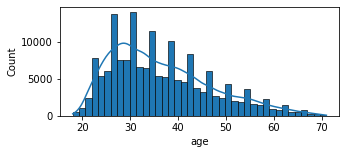

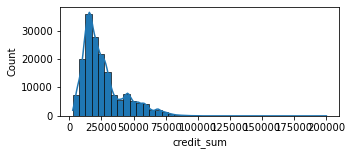

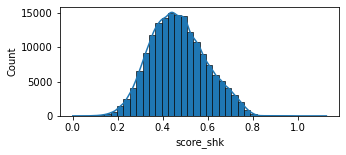

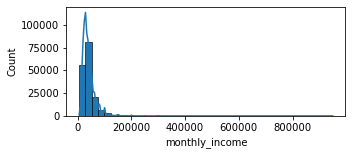

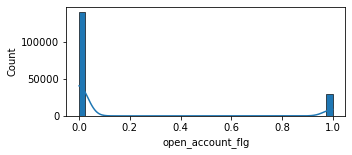

In [24]:
for col in new_data[['age', 'credit_sum', 'score_shk', 'monthly_income', 'open_account_flg']]:
    plt.figure(figsize=(5,2))
    sns.histplot(new_data[col], kde=True, bins = 40, alpha = 1)
    plt.show()

* Выполним проверку на нормальность 

In [25]:
def normal_test(col):    
    stat, p = stats.normaltest(new_data[col])
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print(f'{col} Принять гипотезу о нормальности')
    else:
        print(f'{col} Отклонить гипотезу о нормальности')

In [26]:
for col in ['age', 'credit_sum', 'score_shk', 'monthly_income']:
    normal_test(col)

Statistics=12197.689, p-value=0.000
age Отклонить гипотезу о нормальности
Statistics=45025.327, p-value=0.000
credit_sum Отклонить гипотезу о нормальности
Statistics=2321.482, p-value=0.000
score_shk Отклонить гипотезу о нормальности
Statistics=186096.740, p-value=0.000
monthly_income Отклонить гипотезу о нормальности


* Посмотрим на выбросы

<AxesSubplot:>

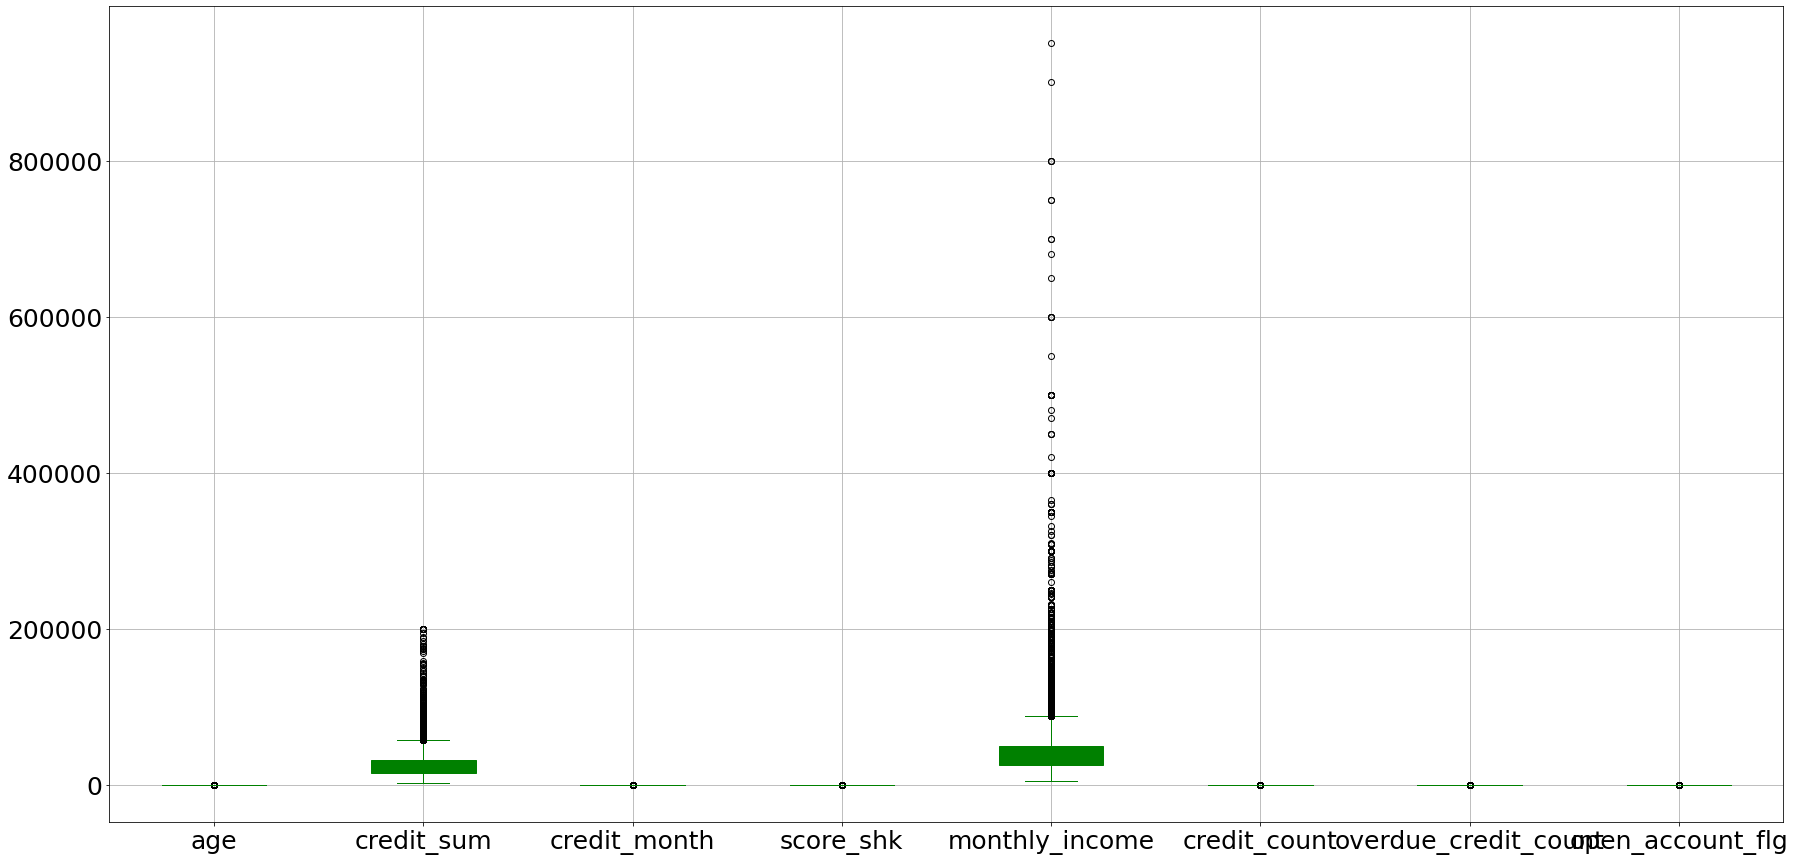

In [27]:
new_data.boxplot(figsize=(30,15), color = 'g', patch_artist=True, fontsize = 25)

* Удалим выбросы +- 3std 

In [28]:
for col in ['age', 'credit_sum', 'score_shk', 'monthly_income']:
    new_data = new_data[(np.abs(stats.zscore(new_data[col])) < 3)]

<AxesSubplot:>

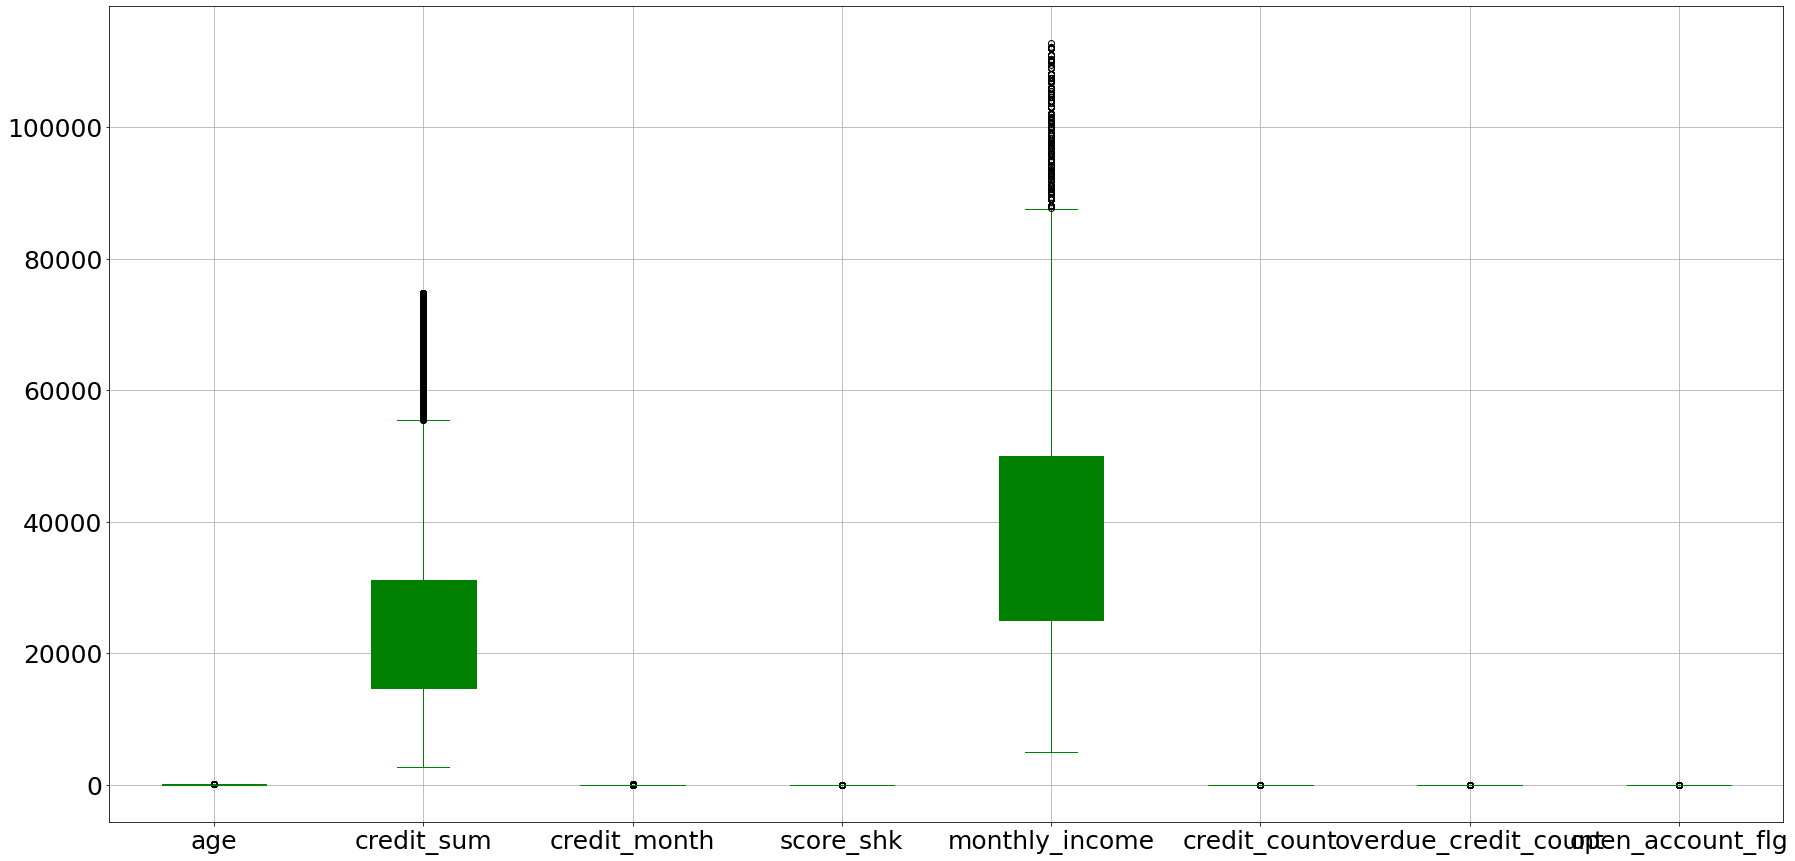

In [29]:
new_data.boxplot(figsize=(30,15), color = 'g', patch_artist=True, fontsize = 25)

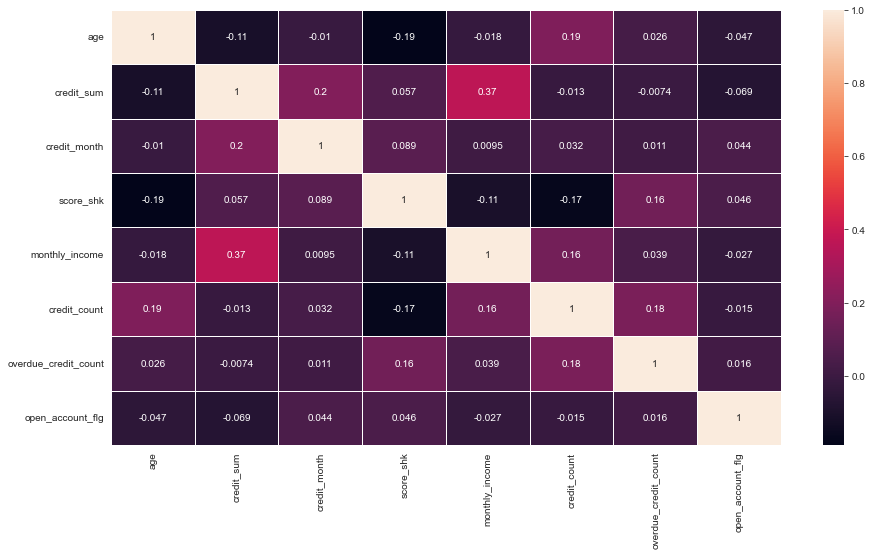

In [28]:
from scipy.stats import pearsonr
corr = new_data.corr(method='spearman')
sns.set({'figure.figsize':(15,8)})
sns.heatmap(corr, annot=True, linewidths=0.5)
None

* Преобразуем котигариальные переменные

In [31]:
new_data = pd.concat([new_data, 
                      pd.get_dummies(new_data['gender'], prefix="gender"),
                      pd.get_dummies(new_data['job_position'], prefix="job_position"),
                      pd.get_dummies(new_data['education'], prefix="education"),
                      pd.get_dummies(new_data['marital_status'], prefix="marital_status"),
                      pd.get_dummies(new_data['living_region'], prefix="living_region")],
                      axis = 1)

In [32]:
new_data.drop(['gender','job_position','education','marital_status', 'living_region'], axis=1, inplace=True) 
#удалим котигариальные переменные

In [33]:
new_data.head(2)

,age,credit_sum,credit_month,tariff_id,score_shk,monthly_income,credit_count,overdue_credit_count,open_account_flg,gender_F,...,living_region_ХАБАРОВСКИЙ КРАЙ,living_region_ХАКАСИЯ РЕСП,living_region_ХАНТЫ-МАНСИЙСКИЙ АО,living_region_ЧЕЛЯБИНСКАЯ ОБЛ,living_region_ЧИТИНСКАЯ ОБЛ,living_region_ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ,living_region_ЧУКОТСКИЙ АО,living_region_ЭВЕНКИЙСКИЙ АО,living_region_ЯМАЛО-НЕНЕЦКИЙ АО,living_region_ЯРОСЛАВСКАЯ ОБЛ
0,36.497262,59998.0,10,1.6,0.469473,30000.000000,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36.497262,10889.0,6,1.1,0.469473,40138.596149,2.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0


* Разделим дата сет на тренировочную и тестовые выборки 

In [34]:
features = new_data.columns.tolist()
features.remove('open_account_flg')
X_train, X_test, y_train, y_test = train_test_split(
      new_data[features], new_data.open_account_flg, test_size=0.33, random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(110614, 122)
(54482, 122)
(110614,)
(54482,)


In [36]:
scaler = MinMaxScaler(feature_range=(-1, 1)) # скалируем данные 

train_X_scaled = scaler.fit_transform(X_train)
test_X_scaled = scaler.fit_transform(X_test)

In [43]:
print(train_X_scaled[:1])

[[ 0.44        0.40635542 -0.57575758  0.25        0.4203286   0.20705664
  -0.68421053 -1.          1.         -1.         -1.          1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.          1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.          1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score (X_test, y_test)

0.8220329650159686

In [42]:
y_pred = rfc.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.728589607781177

### Вывод:
* Максимальная положительная корреляция между суммой кредита и заработной платой составила 0.37
* Не один из представленных числовых столбцов не соответствует нормальному распределению 
* Удаление выбросов в данной задаче, не показало лучших результатов 
* Используя при скалировании данных MinMaxScaler в диапазоне +-1, RandomForest с использованием стандартных настроек, показал следующие результаты:
* Без удаления выбросов: 
 * на не скалированных данных rfc auc 0.729712782475387
 * на скалированных данных rfc auc 0.7287425892331815
* C удалением выбросов: 
 * на не скалированных данных rfc auc 0.728589607781177
 * на скалированных данных rfc auc 0.7264708573663652
#### Лучший результатат RF без удаления выбросов, на не скалируемых данных  0.729712782475387
